## Análise Descritiva e Preditiva da Gestão de Esgotos em Goiás

### ADENILSON SILVA

Para controle do fluxo de atividades do projeto, a consultoria utilizou o trello. Painel: [aqui](https://trello.com/b/lFtNAxQD/projeto-analise-temporal-da-gestao-de-esgotos-em-goias-1992-2021-e-perspectivas-futuras-2022-2032).

# ANÁLISE EXPLORATÓRIA DOS DADOS

A seguir, é apresentado o código utilizado pela consultoria para a análise exploratória dos dados do projeto.

####  1 - Importando bibliotecas

In [1]:
import pandas as pd  # Usada para trabalhar com dados em formato de tabela (DataFrame)
import matplotlib.pyplot as plt  # Importa a biblioteca Matplotlib para criação de gráficos
import matplotlib.gridspec as gridspec  # Permite criar layouts de gráficos personalizados
import numpy as np  # Importa a biblioteca NumPy, usada para trabalhar com arrays numéricos
from scipy import stats # Usado para operações estatísticas

#### 2 -  Obtendo todos os dados tratados


In [2]:
# Gerando o Dataframe com a série histórica da coleta e tratamento de esgotos dos municipios de Goiás
df = pd.read_csv('dados_GO/B - dado_tratado/df_municipios_habitantes_saneamento_codigo.csv', 
                delimiter = ';',
                encoding = 'utf-8',
                index_col= False)

# Ordenando o DataFrame df por Município e Ano
df = df.sort_values(['Município', 'Ano'])

# Visualizando os primeiros 5 registros do Dataframe
df.head()

,Código do Município (IBGE),Município,Ano,População Total Urbana,Volume de esgoto produzido - 1000 m³,Volume de esgotos coletado - 1000 m³,Volume de esgotos tratado - 1000 m³
0,5200050.0,Abadia de Goiás,1992,0,0.00,0.0,0.0
246,5200050.0,Abadia de Goiás,1993,0,0.00,0.0,0.0
492,5200050.0,Abadia de Goiás,1994,0,0.00,0.0,0.0
738,5200050.0,Abadia de Goiás,1995,0,0.00,0.0,0.0
6396,5200050.0,Abadia de Goiás,1996,1560,74.02,0.0,0.0


**Observação:** 

Para fins de análise populacional, procedeu-se à agregação da totalidade da população urbana do estado de Goiás por ano, resultando no DataFrame denominado "df_ano_populacao". Essa consolidação dos dados teve como objetivo obter uma base de informações abrangente para todo o estado, eliminando a granularidade por município. Essa abordagem foi adotada com a finalidade de simplificar a representação gráfica dos dados.

In [3]:
# Criando um DataFrame 'df_ano_populacao' que agrupa a população urbana por ano
df_ano_populacao = pd.DataFrame(df.groupby('Ano')['População Total Urbana'].sum()).reset_index()

# Calculando a velocidade de crescimento anual da população urbana
df_ano_populacao['Velocidade de Crescimento (hab/ano)'] = \
    (df_ano_populacao['População Total Urbana'] -\
         df_ano_populacao['População Total Urbana'].shift(1)).fillna(0)

# Calculando a aceleração de crescimento anual da população urbana
df_ano_populacao['Aceleração de Crescimento (hab/ano²)'] = \
    (df_ano_populacao['Velocidade de Crescimento (hab/ano)'] - \
         df_ano_populacao['Velocidade de Crescimento (hab/ano)'].shift(1)).fillna(0)

# Exibindo as primeiras linhas do DataFrame 'df_ano'
df_ano_populacao.head()

,Ano,População Total Urbana,Velocidade de Crescimento (hab/ano),Aceleração de Crescimento (hab/ano²)
0,1992,3700435,0.0,0.0
1,1993,3766331,65896.0,65896.0
2,1994,3828914,62583.0,-3313.0
3,1995,3889952,61038.0,-1545.0
4,1996,4039498,149546.0,88508.0


#### 3 -  Análise Populacional do Estado

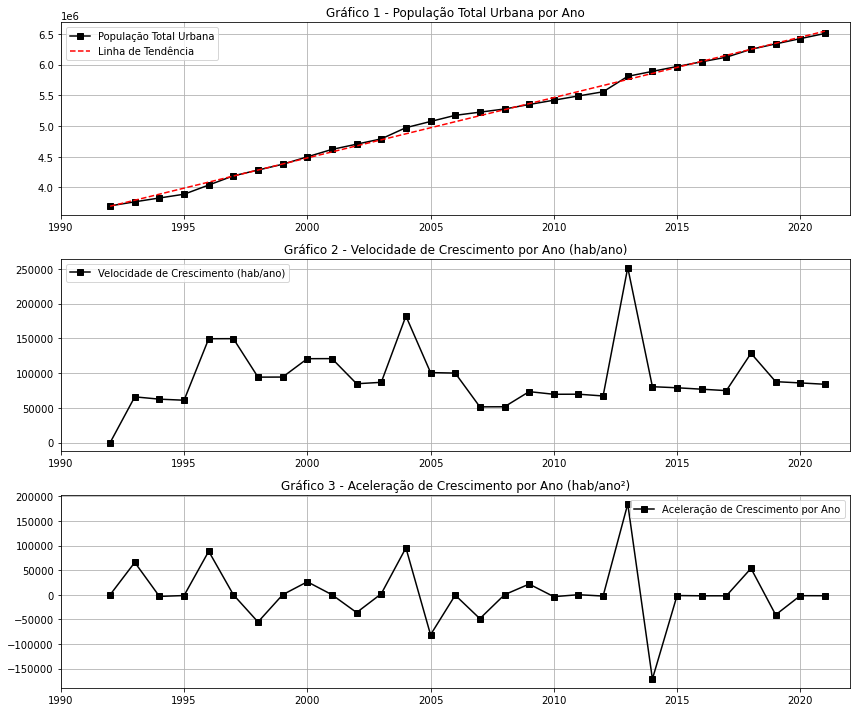

In [4]:
# Criando uma figura com layout de subplots personalizado
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1])

ax1 = plt.subplot(gs[0, :])
ax1.plot(df_ano_populacao['Ano'], df_ano_populacao['População Total Urbana'], 
         label='População Total Urbana', color='black', marker='s')
x = df_ano_populacao['Ano']
y = df_ano_populacao['População Total Urbana']
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)
ax1.plot(x, trendline(x), color='red', linestyle='--', label='Linha de Tendência')
ax1.set_title('Gráfico 1 - População Total Urbana por Ano')
ax1.set_xlim(1990, 2022) 
ax1.grid(True)
ax1.legend()

# Gráfico 2: Velocidade de Crescimento (hab/ano)
ax2 = plt.subplot(gs[1, :])
ax2.plot(df_ano_populacao['Ano'], df_ano_populacao['Velocidade de Crescimento (hab/ano)'], 
         label='Velocidade de Crescimento (hab/ano)', color='black', marker='s')
ax2.set_title('Gráfico 2 - Velocidade de Crescimento por Ano (hab/ano)')
ax2.set_xlim(1990, 2022)
ax2.grid(True)
ax2.legend()

# Gráfico 3: Aceleração de Crescimento (hab/ano²) 
ax3 = plt.subplot(gs[2, :])
ax3.plot(df_ano_populacao['Ano'], df_ano_populacao['Aceleração de Crescimento (hab/ano²)'],
         label='Aceleração de Crescimento por Ano', color='black', marker='s')
ax3.set_title('Gráfico 3 - Aceleração de Crescimento por Ano (hab/ano²)')
ax3.set_xlim(1990, 2022)
ax3.grid(True)
ax3.legend()

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo a figura
plt.show()

**Observação:** 

Foram adicionadas ao DataFrame "df_ano" as colunas “Velocidade de Crescimento (hab/ano)” e “Aceleração de Crescimento (hab/ano²)”. A primeira coluna foi calculada pela derivada (1ª diferenciação) dos valores na coluna “População Total Urbana” em relação ao ano correspondente, representando assim a taxa de variação anual da população. Ademais, a segunda coluna foi calculada pela derivada (2ª diferenciação) dos dados na coluna “Velocidade de Crescimento (hab/ano)” em relação ao ano correspondente, refletindo a variação anual na taxa de crescimento populacional. Ressalta-se ainda que os valores nulos das referidas colunas foram substituídos pelo valor 0.

In [5]:
# Criando um DataFrame a partir das séries com as colunas 'Ano', 'Valor Real' e 'Valor Previsto'
df_teste_p_valor = pd.DataFrame({'Ano': x, 'Valor Real': y, 'Valor Previsto': trendline(x)})

# Calculando a coluna 'Diferença' como a diferença entre 'Valor Previsto' e 'Valor Real'
df_teste_p_valor['Diferença'] = df_teste_p_valor['Valor Previsto'] - df_teste_p_valor['Valor Real']

# Realizando teste t pareado para comparar 'Valor Previsto' e 'Valor Real'
t_statistic, p_valor = stats.ttest_rel(df_teste_p_valor['Valor Previsto'], 
                                       df_teste_p_valor['Valor Real'])

# Definindo o nível de significância (alpha)
alpha = 0.05  

# Verificando se a diferença é estatisticamente significativa com base no p-valor
if p_valor < alpha:
    print(f"Diferença estatisticamente significativa (p_value: {p_valor.round(4)})")
else:
    print(f"Não há diferença estatisticamente significativa (p_value: {p_valor.round(4)})")

Não há diferença estatisticamente significativa (p_value: 1.0)


In [6]:
# Extraindo as colunas 'Valor Previsto' e 'Valor Real' do DataFrame
valor_previsto = trendline(x)
valor_real = y

# Calculando os resíduos subtraindo 'Valor Previsto' de 'Valor Real'
residuos = valor_real - valor_previsto

# Calculando a soma dos quadrados dos resíduos (SSR)
ss_residuos = (residuos ** 2).sum()

# Calculando a soma dos quadrados totais (SST) comparando 'Valor Real' com sua média
ss_total = ((valor_real - valor_real.mean()) ** 2).sum()

# Calculando o coeficiente de determinação (R²)
r_squared = 1 - (ss_residuos / ss_total)

# Exibindo o valor do R² arredondado para 4 casas decimais
print("R²:", r_squared.round(4))

R²: 0.9964


**Observação:**

O gráfico oriundo da variável “População Total Urbana” apresentou, notoriamente, comportamento linear positivo. Foi possível inferir que a linha de tendência, obtida com o auxílio da biblioteca numpy, poderia perfeitamente ser utilizada como modelo representativo da curva real, a comprovação de tal fato foi constatada por meio do cálculo do p-valor, que resultou em aproximadamente 1; ou seja, adotando o valor de α = 0,05, verifica-se que p-valor > α, portanto não há diferença estatisticamente significativa.
Outra medida estatística calculada foi o coeficiente de determinação (R-squared ou R²), resultando no valor de 0,9964. Sabe-se que valores próximos de 1 indicam que o modelo de regressão (função) explica toda a variabilidade da variável dependente. 

#### 4 -  Análise dos Volumes de Esgotos Produzidos, Coletados e Tratados do estado de Goiás

In [7]:
# Listando das colunas relevantes que serão usadas na análise
colunas = ['Volume de esgoto produzido - 1000 m³',
           'Volume de esgotos coletado - 1000 m³',
           'Volume de esgotos tratado - 1000 m³']

# Criando um novo DataFrame (df_ano) com base no agrupamento por ano ('Ano')
df_ano = pd.DataFrame(df.groupby('Ano')[colunas].sum()).reset_index()

# Calculando a coluna 'Relação coletado/produzido (%)'
df_ano['Relação coletado/produzido (%)'] = \
    ((df_ano['Volume de esgotos coletado - 1000 m³'] /
      df_ano['Volume de esgoto produzido - 1000 m³']) * 100).round(2).fillna(0)

# Calculando a coluna 'Relação tratado/coletado (%)'
df_ano['Relação tratado/coletado (%)'] = \
    ((df_ano['Volume de esgotos tratado - 1000 m³'] /
      df_ano['Volume de esgotos coletado - 1000 m³']) * 100).round(2).fillna(0)

# Calculando a coluna 'Relação tratado/produzido (%)'
df_ano['Relação tratado/produzido (%)'] = \
    ((df_ano['Volume de esgotos tratado - 1000 m³'] /
      df_ano['Volume de esgoto produzido - 1000 m³']) * 100).round(2).fillna(0)

# Exibindo as primeiras linhas do DataFrame df_ano
df_ano.head()

,Ano,Volume de esgoto produzido - 1000 m³,Volume de esgotos coletado - 1000 m³,Volume de esgotos tratado - 1000 m³,Relação coletado/produzido (%),Relação tratado/coletado (%),Relação tratado/produzido (%)
0,1992,175585.65,0.0,0.0,0.00,0.00,0.00
1,1993,178712.42,0.0,0.0,0.00,0.00,0.00
2,1994,181682.00,0.0,0.0,0.00,0.00,0.00
3,1995,184578.25,0.0,0.0,0.00,0.00,0.00
4,1996,191674.24,9285.6,7365.7,4.84,79.32,3.84


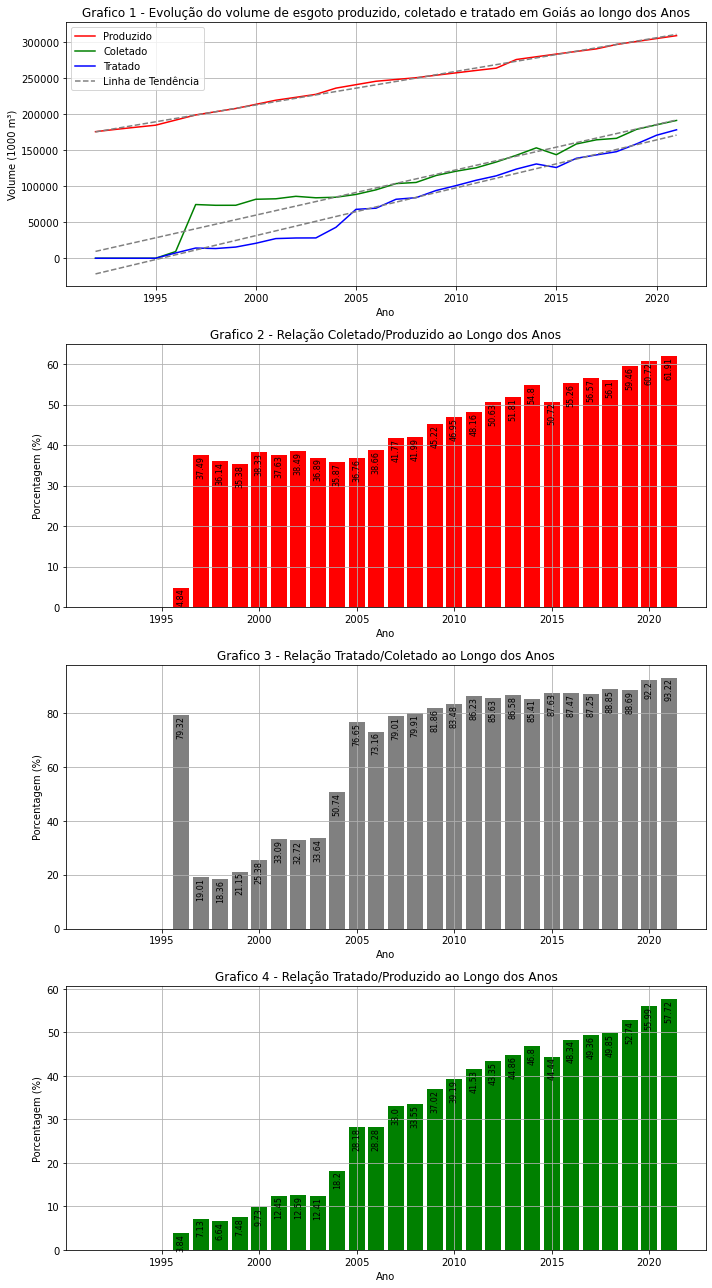

In [8]:
# Criando uma figura com três subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 18))

# Criando os gráficos de linha para cada volume
# Série "Produzido"
axs[0].plot(df_ano['Ano'], df_ano['Volume de esgoto produzido - 1000 m³'], 
            label='Produzido', color='red')
x0 = df_ano['Ano']
y0 = df_ano['Volume de esgoto produzido - 1000 m³']
coefficients0 = np.polyfit(x0, y0, 1)
trendline0 = np.poly1d(coefficients0)
axs[0].plot(x0, trendline0(x0), color='gray', linestyle='--')

# Série "Coletado"
axs[0].plot(df_ano['Ano'], df_ano['Volume de esgotos coletado - 1000 m³'], 
            label='Coletado', color='green')
x1 = df_ano['Ano']
y1 = df_ano['Volume de esgotos coletado - 1000 m³']
coefficients1 = np.polyfit(x1, y1, 1)
trendline1 = np.poly1d(coefficients1)
axs[0].plot(x1, trendline1(x1), color='gray', linestyle='--')

# Série "Tratado"
axs[0].plot(df_ano['Ano'], df_ano['Volume de esgotos tratado - 1000 m³'], 
            label='Tratado', color='blue')
x2 = df_ano['Ano']
y2 = df_ano['Volume de esgotos tratado - 1000 m³']
coefficients2 = np.polyfit(x2, y2, 1)
trendline2 = np.poly1d(coefficients2)
axs[0].plot(x2, trendline2(x2), color='gray', linestyle='--', label='Linha de Tendência')

axs[0].set_title('Grafico 1 - Evolução do volume de esgoto produzido, \
coletado e tratado em Goiás ao longo dos Anos')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Volume (1000 m³)')
axs[0].grid(True)
axs[0].legend()

# Criando os gráficos de barras para cada relação
axs[1].bar(df_ano['Ano'], df_ano['Relação coletado/produzido (%)'], color='red')
for i, valor in enumerate(df_ano['Relação coletado/produzido (%)']):
    if valor != 0:
        axs[1].text(df_ano['Ano'][i], valor, str(valor), 
                    ha='center', va='top', fontsize=8, rotation=90)
axs[1].set_title('Grafico 2 - Relação Coletado/Produzido ao Longo dos Anos')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Porcentagem (%)')
axs[1].grid(True)

axs[2].bar(df_ano['Ano'], df_ano['Relação tratado/coletado (%)'], color='gray')
for i, valor in enumerate(df_ano['Relação tratado/coletado (%)']):
    if valor != 0:
        axs[2].text(df_ano['Ano'][i], valor, str(valor), 
                    ha='center', va='top', fontsize=8, rotation=90)
axs[2].set_title('Grafico 3 - Relação Tratado/Coletado ao Longo dos Anos')
axs[2].set_xlabel('Ano')
axs[2].set_ylabel('Porcentagem (%)')
axs[2].grid(True)

axs[3].bar(df_ano['Ano'], df_ano['Relação tratado/produzido (%)'], color='green')
for i, valor in enumerate(df_ano['Relação tratado/produzido (%)']):
    if valor != 0:
        axs[3].text(df_ano['Ano'][i], valor, str(valor), 
                    ha='center', va='top', fontsize=8, rotation=90)
axs[3].set_title('Grafico 4 - Relação Tratado/Produzido ao Longo dos Anos')
axs[3].set_xlabel('Ano')
axs[3].set_ylabel('Porcentagem (%)')
axs[3].grid(True)

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos de barras
plt.show()

**Observação:**

1 - As curvas relativas aos volumes de esgoto produzido, coletado e tratado apresentaram comportamento linear positivo;

2 - Visualmente, notou-se que, no Gráfico 1, a inclinação da curva de tendência do volume de esgoto tratado é superior à inclinação da curva de tendência do volume de esgoto coletado. Além disso, observou-se que a inclinação da curva de tendência do volume de esgoto coletado é maior que a da curva de tendência do volume de esgoto produzido. Com base nessas constatações, é possível inferir:

- Em um primeiro momento futuro, partindo do princípio <a href="https://pt.wikipedia.org/wiki/Ceteris_paribus" target="_blank">_Ceteris Paribus_</a>, a curva do volume de esgoto tratado encontrará a curva de esgoto coletado. Na prática, isso indicaria que todo o esgoto coletado estará sendo devidamente tratado.
- Em um segundo momento futuro, também partindo do princípio <a href="https://pt.wikipedia.org/wiki/Ceteris_paribus" target="_blank">_Ceteris Paribus_</a>, a curva do volume de esgoto tratado encontrará a curva de esgoto produzido. Na prática, isso indica que todo o esgoto produzido estará sendo devidamente tratado.

3 - Com base no Gráfico 2, foi possível verificar que, entre os anos 1992 e 2021, a taxa de esgotos coletados em relação ao volume de esgoto produzidos variou de 0% a 61,91%.

4 - Com base no Gráfico 3, foi possível verificar que, entre os anos 1992 e 2021, a taxa de esgotos tratados em relação ao volume de esgotos coletados variou de 0% a 93,22%.

5	Com base no Gráfico 4, foi possível verificar que, entre os anos 1992 e 2021, a taxa de esgotos tratados em relação ao volume de esgotos coletados variou de 0% a 57,72%. 

### Dados sobre versão
- Python: 3.11.4
- pandas==1.3.4
- matplotlib==3.4.3
- scipy==1.11.2
- numpy==1.23.5